In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### PART 1


The agent starts at the blue square and moves to a neighbouring state with equal probability. If
the agent moves to a red state, it receives a reward of {20 and goes back to the start, i.e., the blue
square. A move between any two other states receives a reward of {1. A move that attempts to move
outside of the grid receives a reward of {1. The black squares serve as a terminal states. Intuitively,
you can see how the goal here is to pass through the opening in the red “wall” and get to one of the
black squares and hence terminate the episode.
Use the Sarsa and Q-learning algorithms to learn the optimal policy for this task. Plot a trajectory
of an agent utlizing the policy learned by each of the methods.
Are they different or similar? Why or why not? You may assume to use ϵ-greedy action selection for this task. How does the sum of rewards over an episode behaves for each of these two methods.

**Implementation**

1. **Construct the GridWorld:**
   * Define a grid-based environment with specific dimensions, starting point, goal states, and obstacles.
   * Implement functions to initialize the environment and execute agent actions.

2. **Implement Q-learning:**
   * Create a Q-table to store estimated action values.
   * Train an agent by iteratively:
     * Resetting the environment.
     * Selecting actions using an ε-greedy policy.
     * Updating Q-values based on rewards and the Q-learning update rule.

3. **Implement SARSA:**
   * Create a Q-table.
   * Train an agent by iteratively:
     * Resetting the environment.
     * Selecting actions using an ε-greedy policy.
     * Updating Q-values based on rewards and the SARSA update rule.

4. **Train the Agents:**
   * Instantiate the GridWorld environment.
   * Train agents using both Q-learning and SARSA, recording rewards for each episode.

5. **Visualize and Analyze:**
   * Plot the cumulative rewards for both algorithms.
   * Compare the learning curves to understand the performance of each algorithm.


In [2]:
epsilon = 0.1
alpha = 0.5
gamma = 0.9
episodes = 500

In [6]:
class GridWorld:
    def __init__(self):
        """
        Sets up a 5x5 GridWorld environment. 
        An agent starts at a specified location and aims to reach a terminal state.
        Possible actions are moving up, down, left, or right.
        Stepping on a red state incurs a heavy penalty and returns the agent to the start.
        All other moves have a small negative reward to incentivize finding the shortest path. 

        Attributes:
        - grid_size: Dimensions of the grid (rows, columns).
        - start_state: Agent's initial position.
        - terminal_states: Goal locations for the agent.
        - red_states: Penalized positions.
        - state: Agent's current position.
        - actions: Available movement options. 
        """

        self.grid_size = (5, 5)
        self.start_state = (4, 0)
        self.terminal_states = [(0, 0), (0, 4)]
        self.red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
        self.state = self.start_state
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        """
        Resets the environment to its initial state.

        Returns:
        - The agent's starting position on the grid.
        """


        self.state = self.start_state
        return self.state

    def step(self, action):
        """
        Simulates one step in the environment based on the given action.

        Args:
        - action: The direction to move ('up', 'down', 'left', or 'right').

        Returns:
        - next_state: The agent's new position after taking the action.
        - reward: The reward earned from the action.
        - done: Whether the episode has finished (True if the agent reached a terminal state).
        """
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.grid_size[0] - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.grid_size[1] - 1)

        next_state = (x, y)

        # Reward logic
        if next_state in self.terminal_states:
            return next_state, 0, True  # Terminal state reward
        elif next_state in self.red_states:
            self.state = self.start_state
            return self.start_state, -20, False  # Red state penalty and reset
        else:
            self.state = next_state
            return next_state, -1, False  # Regular move penalty

In [7]:
# Q-learning algorithm
def q_learning(env):
    """
    Implements the Q-learning algorithm to learn an optimal policy within the GridWorld environment.

    Args:
    - env: The GridWorld environment for training the agent.

    Returns:
    - Q: The Q-table storing estimated action values for each state-action pair.
    - rewards: A list of total rewards earned per episode during training.
    """

    Q = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
    rewards = []
    for _ in range(episodes):
        state = env.reset()
        total_reward = 0
        while True:
            x, y = state
            if np.random.rand() < epsilon:
                action = np.random.choice(len(env.actions))
            else:
                action = np.argmax(Q[x, y])

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            nx, ny = next_state

            Q[x, y, action] += alpha * (reward + gamma * np.max(Q[nx, ny]) - Q[x, y, action])

            if done:
                break
            state = next_state
        rewards.append(total_reward)
    return Q, rewards

In [8]:
# Sarsa algorithm
def sarsa(env):
    """
    Implements the SARSA (State-Action-Reward-State-Action) algorithm to learn an optimal policy for the given GridWorld environment.

    Args:
    - env: The GridWorld environment to learn in.

    Returns:
    - Q: The Q-table mapping state-action pairs to their estimated values.
    - rewards: A list of total rewards for each completed episode.
    """

    Q = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))
    rewards = []
    for _ in range(episodes):
        state = env.reset()
        x, y = state
        if np.random.rand() < epsilon:
            action = np.random.choice(len(env.actions))
        else:
            action = np.argmax(Q[x, y])

        total_reward = 0
        while True:
            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            nx, ny = next_state

            if np.random.rand() < epsilon:
                next_action = np.random.choice(len(env.actions))
            else:
                next_action = np.argmax(Q[nx, ny])

            Q[x, y, action] += alpha * (reward + gamma * Q[nx, ny, next_action] - Q[x, y, action])

            if done:
                break

            state = next_state
            x, y = state
            action = next_action
        rewards.append(total_reward)
    return Q, rewards

In [9]:
# Instantiate the environment
env = GridWorld()

In [10]:
# Learn policies using Q-learning and Sarsa
q_learning_policy, q_learning_rewards = q_learning(env)
sarsa_policy, sarsa_rewards = sarsa(env)

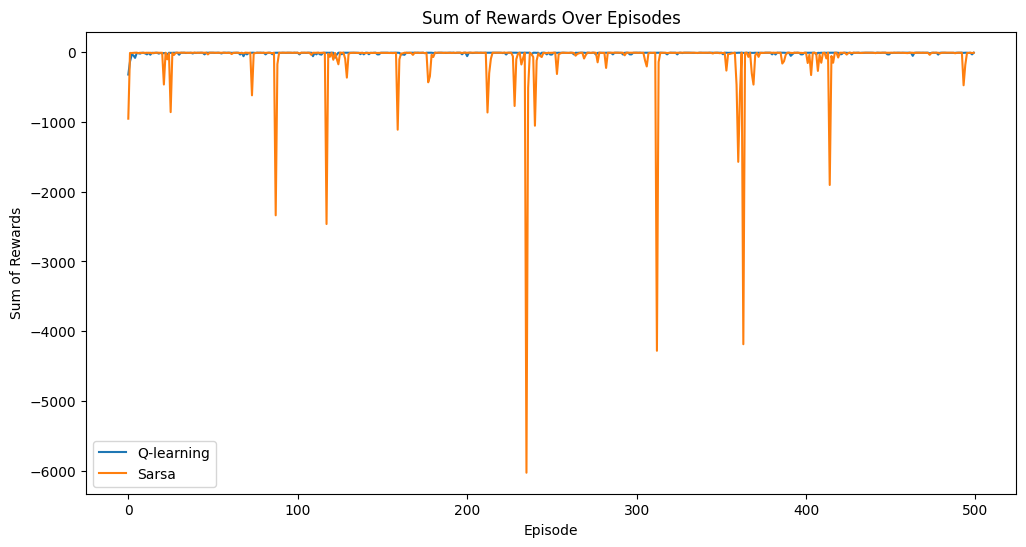

In [11]:
# Plotting the sum of rewards over episodes
plt.figure(figsize=(12, 6))
plt.plot(q_learning_rewards, label='Q-learning')
plt.plot(sarsa_rewards, label='Sarsa')
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards')
plt.title('Sum of Rewards Over Episodes')
plt.legend()
plt.show()


In [12]:
# Simulate trajectories
def simulate_policy(env, Q):
    state = env.reset()
    trajectory = [state]
    while True:
        x, y = state
        action = np.argmax(Q[x, y])
        next_state, _, done = env.step(env.actions[action])
        trajectory.append(next_state)
        if done:
            break
        state = next_state
    return trajectory

In [13]:
# Simulate trajectories
q_learning_trajectory = simulate_policy(env, q_learning_policy)
sarsa_trajectory = simulate_policy(env, sarsa_policy)

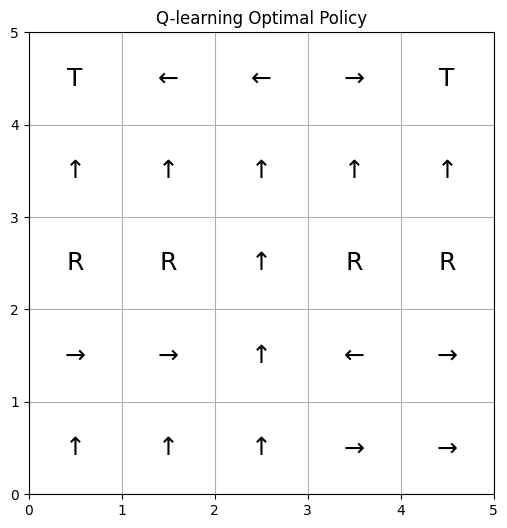

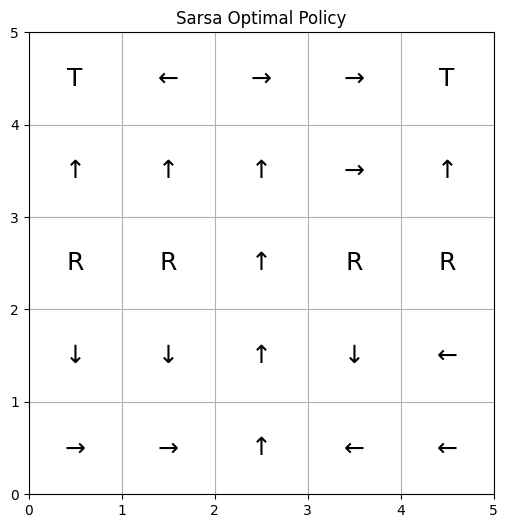

In [28]:
# Function to simulate and plot the policy as arrows on the grid
def plot_policy(env, Q, title):
    """
    Plots the optimal policy derived from the Q-table for the given environment.

    Args:
    - env: The GridWorld environment for which the policy is to be plotted.
    - Q: The Q-table (state-action value function) as a 3D NumPy array where Q[x, y, a] represents 
         the value of taking action 'a' in state (x, y).
    - title: A string representing the title of the plot.
    """
    policy_grid = np.full(env.grid_size, ' ')
    for i in range(env.grid_size[0]):
        for j in range(env.grid_size[1]):
            if (i, j) in env.terminal_states:
                policy_grid[i, j] = 'T'  # Terminal state
            elif (i, j) in env.red_states:
                policy_grid[i, j] = 'R'  # Red state
            else:
                action = np.argmax(Q[i, j])
                if action == 0:
                    policy_grid[i, j] = '↑'
                elif action == 1:
                    policy_grid[i, j] = '↓'
                elif action == 2:
                    policy_grid[i, j] = '←'
                elif action == 3:
                    policy_grid[i, j] = '→'
    plt.figure(figsize=(6, 6))
    for i in range(env.grid_size[0]):
        for j in range(env.grid_size[1]):
            plt.text(j + 0.5, env.grid_size[0] - i - 0.5, policy_grid[i, j], ha='center', va='center', fontsize=18)
    plt.xlim(0, env.grid_size[1])
    plt.ylim(0, env.grid_size[0])
    plt.gca()
    plt.title(title)
    plt.grid(True)
    plt.show()
# Plot the policies
plot_policy(env, q_learning_policy, "Q-learning Optimal Policy")
plot_policy(env, sarsa_policy, "Sarsa Optimal Policy")

In [25]:
# Plot the trajectories on the grid
def plot_trajectory(env, trajectory, title):
    grid = np.zeros(env.grid_size)
    for (x, y) in trajectory:
        grid[x, y] = 1
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="Greys", origin="upper", extent=(0, 5, 0, 5))
    plt.plot([y + 0.5 for _, y in trajectory], [4.5 - x for x, _ in trajectory], marker='o', color='r')
    plt.title(title)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.gca()
    plt.grid(True)
    plt.show()

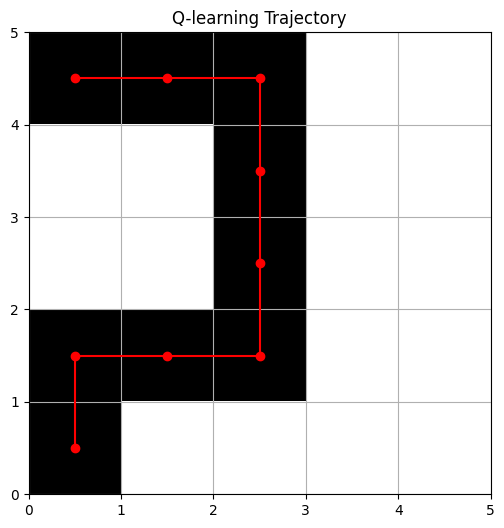

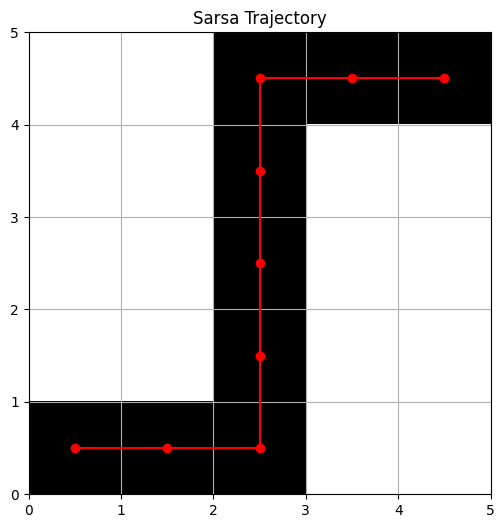

In [26]:
plot_trajectory(env, q_learning_trajectory, "Q-learning Trajectory")
plot_trajectory(env, sarsa_trajectory, "Sarsa Trajectory")

#### PART 2


Consider a scenario where we have a random walk on a 7 × 7 grid. That is, we are equally likely to
move up, down, left, or right. Suppose that we start the random walk at the precise center of the grid.
We assume that the lower left and upper right corners are terminal states, with, respectively, rewards
of 1 and -1. Rewards for transitions between two states are 0, if an attempt to transition outside the
wall is made, the agent stays in the same spot and receives a reward of 0.
 Compute the value function for this “random walk” policy using (1) gradient Monte Carlo method and (2) the semi-gradient TD(0)
method with an affine function approximation. How does it compare to the exact value function?

***Implementation***

***Environment Setup***
A `RandomWalkGrid` environment is created, representing a 7x7 grid with specific start, terminal, and reward states. The environment provides functions to reset the agent's position and simulate agent movements.

***Feature Extraction***
A simple feature extraction method is employed to represent grid states as numerical vectors for use in function approximation.

***Value Function Approximation***
Three methods are implemented to estimate the value function:
* Gradient Monte Carlo: Employs Monte Carlo samples and gradient descent to learn parameters of a linear value function approximator.
* Semi-Gradient TD(0): Uses temporal difference learning with gradient descent to update value function parameters.
* Exact Value Function: Computes the exact value function using dynamic programming or iterative methods.

***Training and Evaluation***
Each method is applied to the grid environment, and their estimated value functions are compared to the exact value function. Results are visualized to assess the performance of different approaches.



In [15]:
# Define the 7x7 grid environment
class RandomWalkGrid:
    """
    Creates a 7x7 RandomWalkGrid environment.

    The agent starts at the center and can move up, down, left, or right. 
    The goal is to reach either the top-right corner (reward 1) or bottom-left corner (reward -1).

    Attributes:
    - grid_size: Dimensions of the grid (rows, columns).
    - initial_state: Starting position of the agent.
    - terminal_rewards: Rewards associated with terminal states.
    - current_state: Agent's current position.
    - possible_actions: Available actions for the agent.
    - action_effects: How actions modify the agent's position.
    """

    def __init__(self):
        self.grid_size = (7, 7)
        self.initial_state = (3, 3)  # Center of the grid
        self.terminal_rewards = {(6, 0): -1, (0, 6): 1}
        self.current_state = self.initial_state
        self.possible_actions = ['up', 'down', 'left', 'right']
        self.action_effects = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

    def reset(self):
        self.current_state = self.initial_state
        return self.current_state

    def step(self):
        if self.current_state in self.terminal_rewards:
            return self.current_state, self.terminal_rewards[self.current_state], True

        action = np.random.choice(self.possible_actions)
        effect = self.action_effects[action]
        next_state = (self.current_state[0] + effect[0], self.current_state[1] + effect[1])

        if 0 <= next_state[0] < self.grid_size[0] and 0 <= next_state[1] < self.grid_size[1]:
            self.current_state = next_state
            return next_state, 0, False
        else:
            return self.current_state, 0, False

In [16]:
# Feature extractor for linear function approximation
def extract_features(state):
    """
    Extracts features from the given state for linear function approximation.

    Args:
    - state: The agent's position on the grid as an (x, y) tuple.

    Returns:
    - A NumPy array representing the feature vector: [1, x, y].
        - 1: Bias term.
        - x: Row index of the state.
        - y: Column index of the state.
    """

    x, y = state
    return np.array([1, x, y])  # Affine function with features [1, x, y]


In [17]:
# Gradient Monte Carlo method
def gradient_monte_carlo_method(grid_env, num_episodes, learning_rate):
    """
    Implements the Gradient Monte Carlo method to estimate the value function.

    Args:
    - grid_env: The GridWorld environment for training.
    - num_episodes: Number of episodes to run for parameter learning.
    - learning_rate: Step size for updating parameters.

    Returns:
    - parameters: Learned parameters of the linear value function.
    """

    parameters = np.zeros(3)
    for _ in range(num_episodes):
        state = grid_env.reset()
        trajectory = []
        while True:
            next_state, reward, done = grid_env.step()  # No action needed as input
            trajectory.append((state, reward))
            if done:
                break
            state = next_state

        G = 0
        for state, reward in reversed(trajectory):
            G = reward + G
            features = extract_features(state)
            value_estimate = np.dot(parameters, features)
            parameters += learning_rate * (G - value_estimate) * features

    return parameters

In [18]:

def semi_gradient_td_method(grid_env, num_episodes, learning_rate, discount_factor):
    """
    Implements the Semi-Gradient TD(0) method for approximating the value function.

    Args:
    - grid_env: The GridWorld environment for training.
    - num_episodes: Number of episodes to run for parameter learning.
    - learning_rate: Step size for updating parameters.
    - discount_factor: Discount factor (gamma) for future rewards.

    Returns:
    - parameters: Learned parameters of the linear value function.
    """

    parameters = np.zeros(3)
    for _ in range(num_episodes):
        state = grid_env.reset()
        while True:
            next_state, reward, done = grid_env.step()  # No action needed as input

            features = extract_features(state)
            next_features = extract_features(next_state)
            value_estimate = np.dot(parameters, features)
            next_value_estimate = np.dot(parameters, next_features)

            parameters += learning_rate * (reward + discount_factor * next_value_estimate - value_estimate) * features

            if done:
                break
            state = next_state

    return parameters

In [19]:
# Exact value function (by dynamic programming or other exact methods)
def exact_value_function(grid_env, gamma=1.0):
    """
    Calculates the exact value function for each state in the grid environment.

    Args:
    - grid_env: The grid environment with defined rewards and terminal states.
    - gamma: The discount factor for future rewards.

    Returns:
    - exact_values: A NumPy array representing the value function for each state.
    """

    exact_values = np.zeros(grid_env.grid_size)
    states = [(x, y) for x in range(grid_env.grid_size[0]) for y in range(grid_env.grid_size[1])]

    def get_exact_value(state):
        """
        Returns the value of a given state. Terminal states have their specified reward, non-terminal states have a value of 0.
        """

        if state in grid_env.terminal_rewards:
            return grid_env.terminal_rewards[state]
        return 0

    for _ in range(1000):  # Iterate enough times to ensure convergence
        new_values = np.zeros_like(exact_values)
        for state in states:
            if state in grid_env.terminal_rewards:
                new_values[state] = grid_env.terminal_rewards[state]
            else:
                x, y = state
                state_values = []
                for action in grid_env.possible_actions:
                    effect = grid_env.action_effects[action]
                    next_state = (x + effect[0], y + effect[1])
                    if 0 <= next_state[0] < grid_env.grid_size[0] and 0 <= next_state[1] < grid_env.grid_size[1]:
                        state_values.append(get_exact_value(next_state))
                    else:
                        state_values.append(get_exact_value(state))
                new_values[state] = np.mean(state_values)
        exact_values = new_values
    return exact_values


In [20]:
# Instantiate the environment
grid_env = RandomWalkGrid()

In [21]:
# Run the Gradient Monte Carlo method
theta_mc = gradient_monte_carlo_method(grid_env, num_episodes=5000, learning_rate=0.01)
V_mc = np.array([[np.dot(theta_mc, extract_features((i, j))) for j in range(grid_env.grid_size[1])] for i in range(grid_env.grid_size[0])])

In [22]:
# Run the Semi-Gradient TD(0) method
theta_td = semi_gradient_td_method(grid_env, num_episodes=5000, learning_rate=0.01, discount_factor=1.0)
V_td = np.array([[np.dot(theta_td, extract_features((i, j))) for j in range(grid_env.grid_size[1])] for i in range(grid_env.grid_size[0])])

In [23]:
# Compute the exact value function
V_exact = exact_value_function(grid_env)

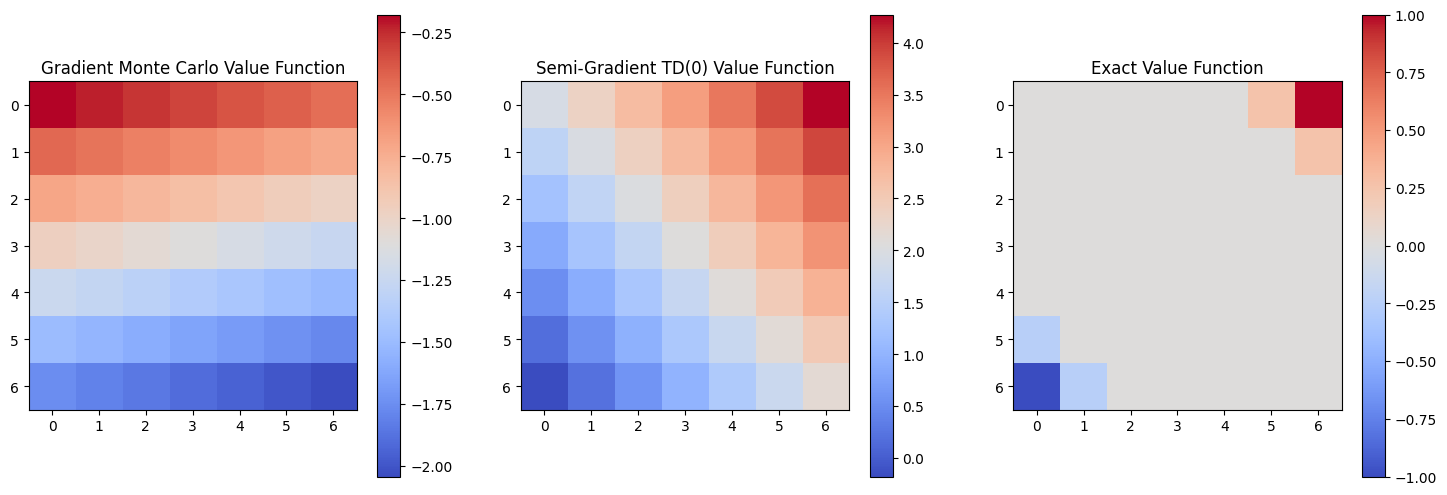

In [24]:
# Plotting the value functions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im1 = axes[0].imshow(V_mc, cmap='coolwarm', interpolation='nearest')
axes[0].set_title("Gradient Monte Carlo Value Function")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(V_td, cmap='coolwarm', interpolation='nearest')
axes[1].set_title("Semi-Gradient TD(0) Value Function")
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(V_exact, cmap='coolwarm', interpolation='nearest')
axes[2].set_title("Exact Value Function")
plt.colorbar(im3, ax=axes[2])

plt.show()